### Table of Contents
- 1. [Problem Statement](#section1)</br>
    - 1.1 [Introduction](#section101)<br/>
    - 1.2 [Data source and data set](#section102)<br/>
- 2. [Load the packages and data](#section2)</br>
- 3. [Data profiling](#section3)</br>
    - 3.1 [dtypes](#section301)<br/>
    - 3.2 [head](#section302)<br/>
    - 3.3 [describe](#section303)<br/>
    - 3.4 [sample](#section304)<br/>
    - 3.5 [Pandas profiling](#section305)<br/>
    - 3.6 [Initial observations](#section306)<br/>
   
- 4. [Data normalization](#section4)</br>
    - 4.1 [Standardize column headers to lower case](#section401)<br/>
    
- 5. [Identify patterns and observations  in the data](#section5)</br>
    - 5.1 [US province (first 5) which as largest number of food chains](#section501)<br/>
    - 5.2 [Restaurent name (first 5)  which has largest number of food chains across US ](#section502)<br/>
    - 5.3 [Frequency of Restaurent in US provinces ( first 4 province with largest food chains) ](#section503)<br/>
    - 5.4 [Frequency of Restaurent in US provinces ( other than first 4 province with largest food chains)](#section504)<br/>
    - 5.5 [  Frequency of top 3 restaurent chains in first 4 Provinces with high frequency ](#section506)<br/>
    - 5.6 [Frequency of top 5 cities with largest food chains across US](#section507)<br/>
    - 5.7 [Frequency of top 3 restaurent in top 4 cities  cities across us](#section508)<br/>

- 7. [Conclusion](#section7)<br/>

<a id=section1></a> 
## 1. Problem Statement 

"This dataset is given by INSAID to to EDA analysis on restaurent data"
<a id=section101></a> 
### 1.1. Introduction
This Exploratory Data Analysis is to practice Python skills learned till now on a structured data set including loading, inspecting, wrangling, exploring, and drawing conclusions from data. The notebook has observations with each step in order to explain thoroughly how to approach the data set. Based on the observation some questions also are answered in the notebook for the reference though not all of them are explored in the analysis. 

<a id=section102></a> 
### 1.2. Data source and dataset

__a__. How was it collected? 

- It is given by INSAID 

__b__. Is it a sample? If yes, was it properly sampled?
- Yes, it is a sample. We don't have official information about the data collection method, but it appears *not* to be a random sample, so we can assume that it is not representative. 

<a id=section2></a> 
### 2. Load the packages and data 


In [3]:
import sys                                                                      # Import packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline       

df= pd.read_csv("FastFoodRestaurants.csv")


<a id=section3></a> 
### 3. Data Profiling

Review the data types and sample data to understand what variables we are dealing with?<br>
Which variables need to be transformed in some way before they can be analyzed?

<a id=section301></a> 

In [19]:
df.dtypes               

address        object
city           object
country        object
keys           object
latitude      float64
longitude     float64
name           object
postalCode     object
province       object
websites       object
dtype: object

<a id=section302></a> 

In [21]:
df.head()

,address,city,country,keys,latitude,longitude,name,postalCode,province,websites
0,324 Main St,Massena,US,us/ny/massena/324mainst/-1161002137,44.92130,-74.89021,McDonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/..."
1,530 Clinton Ave,Washington Court House,US,us/oh/washingtoncourthouse/530clintonave/-7914...,39.53255,-83.44526,Wendy's,43160,OH,http://www.wendys.com
2,408 Market Square Dr,Maysville,US,us/ky/maysville/408marketsquaredr/1051460804,38.62736,-83.79141,Frisch's Big Boy,41056,KY,"http://www.frischs.com,https://www.frischs.com..."
3,6098 State Highway 37,Massena,US,us/ny/massena/6098statehighway37/-1161002137,44.95008,-74.84553,McDonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/..."
4,139 Columbus Rd,Athens,US,us/oh/athens/139columbusrd/990890980,39.35155,-82.09728,OMG! Rotisserie,45701,OH,"http://www.omgrotisserie.com,http://omgrotisse..."


<a id=section303></a> 

In [37]:
df.describe(include="all")

,address,city,country,keys,latitude,longitude,name,postalCode,province,websites
count,10000,10000,10000,10000,10000.000000,10000.000000,10000,10000,10000,9535
unique,9934,2775,1,10000,NaN,NaN,548,5289,52,3821
top,3900 Las Vegas Blvd S,Cincinnati,US,us/fl/newsmyrnabeach/1704sdixiefwy/-1161002137,NaN,NaN,McDonald's,57701,CA,"http://mcdonalds.com,http://www.mcdonalds.com/..."
freq,3,119,10000,1,NaN,NaN,1886,23,676,1074
mean,NaN,NaN,NaN,NaN,37.552195,-91.056132,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,5.050275,18.556339,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,-6.244273,-159.378915,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,34.028706,-97.412631,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,38.298217,-87.660930,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,41.116765,-81.458351,NaN,NaN,NaN,NaN


<a id=section304></a> 

In [7]:
df.sample(10)

,address,city,country,keys,latitude,longitude,name,postalCode,province,websites
2609,1695 E Kemper Rd,Cincinnati,US,us/oh/cincinnati/1695ekemperrd/-1161002137,39.284774,-84.444467,McDonald's,45246,OH,"http://mcdonalds.com,http://www.mcdonalds.com/..."
262,3596 MT Diablo Blvd,Lafayette,US,us/ca/lafayette/3596mtdiabloblvd/-1322134216,37.891487,-122.123350,Baja Fresh,94549,CA,NaN
4386,8955 Fields Ertel Rd,Cincinnati,US,us/oh/cincinnati/8955fieldsertelrd/93075755,39.292244,-84.314204,Arby's,45249,OH,https://locations.arbys.com/us/oh/cincinnati/8...
3264,513 Saw Mill Rd,West Haven,US,us/ct/westhaven/513sawmillrd/-1161002137,41.270557,-72.974770,McDonald's,6516,CT,http://www.mcdonalds.com
5210,815 Jackson Blvd,Rapid City,US,us/sd/rapidcity/815jacksonblvd/1780593795,44.078180,-103.250590,SONIC Drive In,57702,SD,https://locations.sonicdrivein.com/sd/rapid-ci...
2562,1838 W Sunset Blvd,Saint George,US,us/ut/saintgeorge/1838wsunsetblvd/-791445730,37.122734,-113.623076,Wendy's,84770,UT,http://www.wendys.com
6698,503 S Alvarado St,Los Angeles,US,us/ca/losangeles/503salvaradost/-981164808,34.059895,-118.274820,El Pollo Loco,90057,CA,"http://www.elpolloloco.com,http://elpolloloco...."
4321,100 SE 25th Ave,Mineral Wells,US,us/tx/mineralwells/100se25thave/-390366181,32.809260,-98.087926,Chicken Express,76067,TX,http://www.chickene.com
9639,1562 S Riverside Ave,Rialto,US,us/ca/rialto/1562sriversideave/-230519289,34.071899,-117.370345,Jack in the Box,92376,CA,http://www.jackinthebox.com
2547,4916 W 6200 S,Salt Lake City,US,us/ut/saltlakecity/4916w6200s/-863563290,40.638850,-112.008370,TacoTime,84118,UT,"http://www.tacotime.com,http://api.citygridmed..."


<a id=section305></a> 

In [ ]:
import pandas_profiling                                                      # Get a quick overview for all the variables using pandas_profiling                                         
profile = pandas_profiling.ProfileReport(df)
profile.to_file(outputfile="myoutputfile.html")                              # HTML file will be downloaded to your workspace

<a id=section306></a> 
### Initial Observations:
- Majority of columns are categorical
- Only 2 columns are numerical ,latitude and longitude
- There is missing data on=bserves in website field ( 4.6 %)

<a id=section5></a> 
### 5 Analysis of Pattern in data

<a id=section501></a> 

### 5.1 US province (first 5) which as largest number of food chains

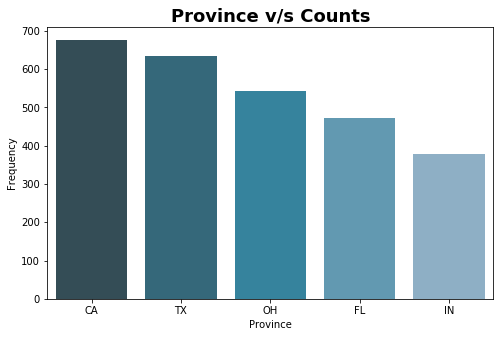

In [30]:
plt.figure(figsize=(8,5))
sns.countplot('province',data = df, order = df['province'].value_counts().head().index,palette="PuBuGn_d")
plt.title("Province v/s Counts",fontsize=18,fontweight="bold")
plt.xlabel('Province')
plt.ylabel('Frequency')
plt.show()

#### Observation: Province CA, TX and CH has highest Frequency for restaurant chain

<a id=section502></a> 
### 5.2 Restaurent name (first 5) which has largest number of food chains across US 

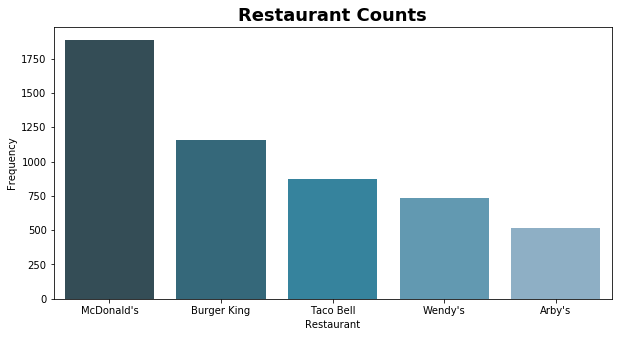

In [9]:
plt.figure(figsize=(10,5))
sns.countplot('name',data = df, order = df['name'].value_counts().head().index,palette="PuBuGn_d")
plt.title("Restaurant Counts",fontsize=18,fontweight="bold")
plt.xlabel('Restaurant')
plt.ylabel('Frequency')
plt.show()

#### Observation: McDonalds has largest no of chains followed by  Burger King and Taco Bell  across US

In [19]:
df_subgroup = df.copy()

df_subgroup = df_subgroup[df_subgroup['province'].isin(['CA','TX','OH','FL'])]




### select dataset for 'CA','TX','OH','FL' Province

In [20]:
df_subgroup_rest = df[~df['province'].isin(['CA','TX','OH','FL'])]


### select dataset for  Provinces other than 'CA','TX','OH','FL'

<a id=section503></a>
### 5.3 Frequency of Restaurent in US provinces ( first 4 province with largest food chains) 

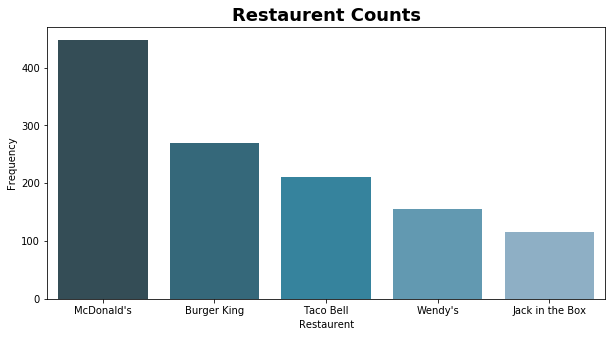

In [13]:
plt.figure(figsize=(10,5))
sns.countplot('name',data = df_subgroup, order = df_subgroup['name'].value_counts().head().index,palette="PuBuGn_d")
plt.title("Restaurent Counts",fontsize=18,fontweight="bold")
plt.xlabel('Restaurent')
plt.ylabel('Frequency')
plt.show()

#### Observation:  In  CA, TX, OH and FL,McDonalds is largest followed by Burger King and Taco Bell

<a id=section504></a> 
### 5.4 Frequency of Restaurent in US provinces ( other than first 4 province with largest food chains)

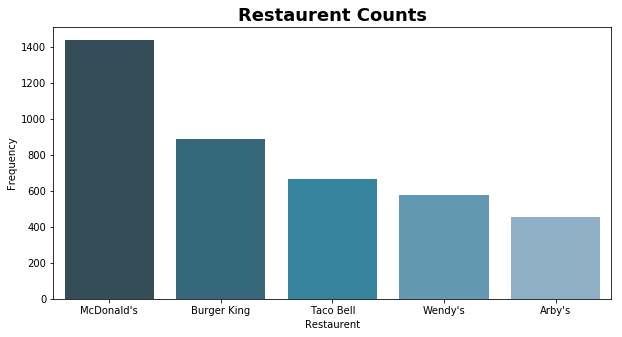

In [27]:
plt.figure(figsize=(10,5))
sns.countplot('name',data = df_subgroup_rest, order = df_subgroup_rest['name'].value_counts().head().index,palette="PuBuGn_d")
plt.title("Restaurent Counts",fontsize=18,fontweight="bold")
plt.xlabel('Restaurent')
plt.ylabel('Frequency')
plt.show()

#### Observation: Provinces (Other than  CA, TX, OH and FL),McDonalds is largest followed by Burger King and Taco Bell

<a id=section506></a> 
### 5.5 Frequency of top 3 restaurent chains in first 4 Provinces with high frequency 


Text(0.5,1,'province  vs Restaurant')

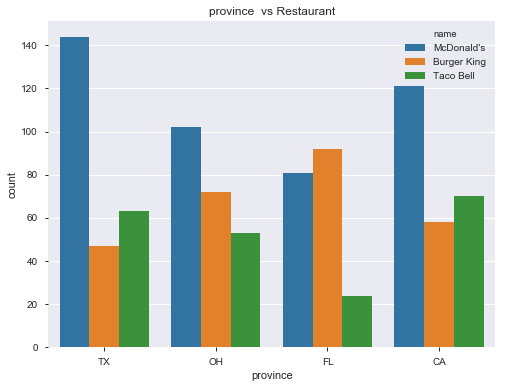

In [49]:
fig,ax =plt.subplots(figsize=(8,6))
sns.countplot(data = df_subgroup[df_subgroup['name'].isin(["McDonald's","Burger King","Taco Bell"])],x = 'province', hue='name')
plt.title('province  vs Restaurant')

#### Observation 1: McDonand has largest food chain across USA but in Province FL, Burger King is largest followed by Mcdonald
#### Observation 2:  BurgerKing  is second largest chain but in province TX and CA, Taco bell is second largest and Burger King is third largest

<a id=section507></a> 
### 5.6 Frequency of top 5 cities with largest food  chains across US


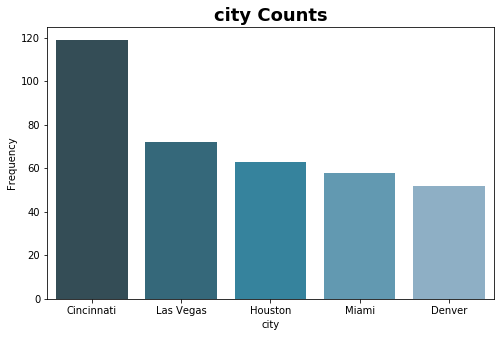

In [33]:
plt.figure(figsize=(8,5))
sns.countplot('city',data = df, order = df['city'].value_counts().head().index,palette="PuBuGn_d")
plt.title("city Counts",fontsize=18,fontweight="bold")
plt.xlabel('city')
plt.ylabel('Frequency')
plt.show()

#### Observation:  In Cities, Cincinati has largest number of food chains followed by Las Vegas, Houston,Miami

<a id=section508></a> 
### 5.7 Frequency of top 3 restaurent in top 4 cities  cities across us


D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5,1,'province  vs Restaurant')

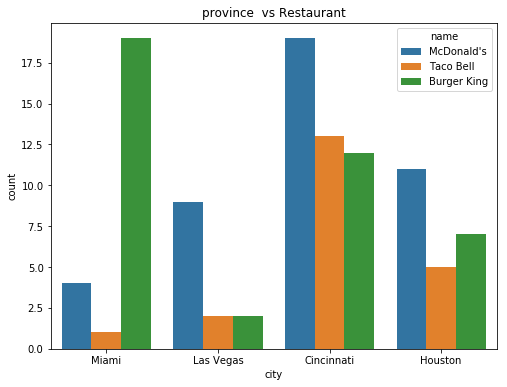

In [34]:
fig,ax =plt.subplots(figsize=(8,6))
sns.countplot(data = df[df['name'].isin(["McDonald's","Burger King","Taco Bell"])]
              [df['city'].isin(["Cincinnati","Las Vegas","Houston","Miami"])],x = 'city', hue='name')
plt.title('province  vs Restaurant')

### Observations:
-  In Miami city, Burger King is largest 
- In Las Vegas, Mcdonals is largest and Burger King and Taco Bell are equal in number
- In Cincinnati, McDonalds is largest followed by Taco Bell

<a id=section7></a> 
### Conclusion:
- __From section 5.1__, We have concluded Province CA, TX and CH has highest Frequency for restaurant chain
- __From section 5.2__, We have concluded McDonalds has largest no of chains followed by Burger King and Taco Bell across US
- __From section 5.6__,Cincinati has largest number of food chains followed by Las Vegas, Houston,Miami
- __From section 5.7__, Mcdonalds is  second largest in Miami. Burger King is largest in Miami
- __From section 5.7__, Taco bell second largest in Cincinnati followed by Burger King
- __From section 5.5__, Burger king is largest in province FL and Mcdonals is second largest. 